## 1. Комплексные числа в Питоне

In [1]:
3+2j

(3+2j)

In [2]:
a = 3
b = 2
z = a + b*1j
print('z =', z, 'with type of', type(z))

z = (3+2j) with type of <class 'complex'>


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import math

print((2.75+3.69*1j)*(8.55-6.13*1j))
print((1.4*np.exp(5.32*1j)))
print((7.51-9.15*1j)/(4.43+9.64*1j))

(46.1322+14.692000000000004j)
(0.799270785858235-1.1494199453957457j)
(-0.4880897698448308-1.0033441577191493j)


## 2. Фигуры, созданные при помощи формулы Жуковского

In [4]:
def zhuk(z, c=1):
    return z+c**2/z

(-2.392044598079452,
 2.3931354229158845,
 -0.9317278841425531,
 0.9317278841425531)

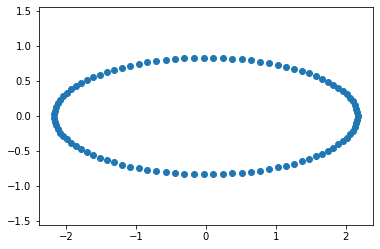

In [5]:
r=1.5
c=1
theta = np.linspace(0, 2*np.pi, 100)
x = r*np.cos(theta)
y = r*np.sin(theta)

z = x + y*1j
z = zhuk(z, c)
plt.scatter(z.real, z.imag)
plt.axis('equal')

(-2.3289910662022955,
 2.2155296991757027,
 -0.5016441049265394,
 0.5016441049265394)

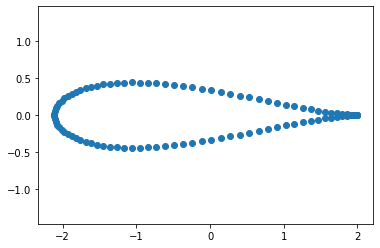

In [6]:
r=1.2
c=1
theta = np.linspace(0, 2*np.pi, 100)
x = r*np.cos(theta) + c-r
y = r*np.sin(theta)

z = x + y*1j
z = zhuk(z, c)
plt.scatter(z.real, z.imag)
plt.axis('equal')

(-2.2121845491075622,
 2.2629430636533225,
 -0.20905234057987754,
 0.5320738363260133)

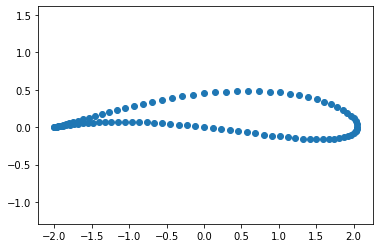

In [7]:
x_c, y_c = 0.1, 0.1

r=np.sqrt((c-x_c)**2+y_c**2)
c=1
theta = np.linspace(0, 2*np.pi, 100)
x = r*np.cos(theta) - x_c
y = r*np.sin(theta) + y_c

z = x + y*1j
z = zhuk(z, c)
plt.scatter(z.real, z.imag)
plt.axis('equal')

## 3. Расчетная сетка в плоскости  $z$ в полярной системе координат

(-5.890214278872491, 5.602225088601247, -5.304480382666638, 5.304480382666638)

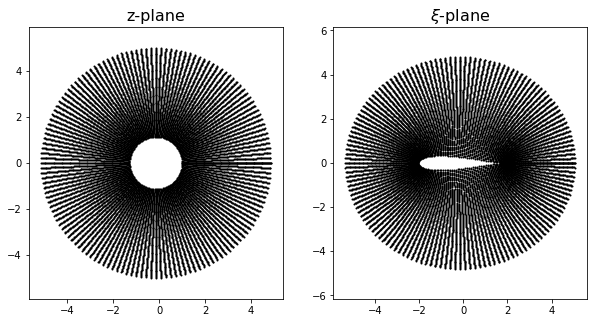

In [8]:
x_c, y_c = -0.15, 0.
Nr = 100
Ntheta = 145
Rad=1.15
c=1
theta = np.linspace(0, 2*np.pi, Ntheta)
r = np.linspace(Rad, 5, Nr)

R, TH = np.meshgrid(r, theta)
X = R*np.cos(TH) + x_c
Y = R*np.sin(TH) + y_c

size = 5
fig = plt.figure(figsize=(size*2, size))
plt.subplot(121)
plt.title('z-plane', fontsize=16)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.scatter(X, Y, color='k', s=1)
plt.axis('equal')

Z = X + Y*1j
Z = zhuk(Z, c)

plt.subplot(122)
plt.title(r'$\xi$-plane', fontsize=16)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.scatter(Z.real, Z.imag, color='k', s=1)
plt.axis('equal')

## 4. Обтекание симметричного профиля Жуковского под нулевым углом атаки

In [9]:
x_doublet, y_doublet = x_c, y_c
u_inf = 1.0

kappa = 2*np.pi*u_inf*(Rad**2)

In [10]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/\
    ((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/\
    ((X-xd)**2+(Y-yd)**2)**2
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
   
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi

In [11]:
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

u_freestream = u_inf*np.ones_like(X)
v_freestream = np.zeros_like(Y)

psi_freestream = u_inf*Y

u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

(-5.344174757281554, 5.056185567010309, -4.800179838145669, 4.800179838145669)

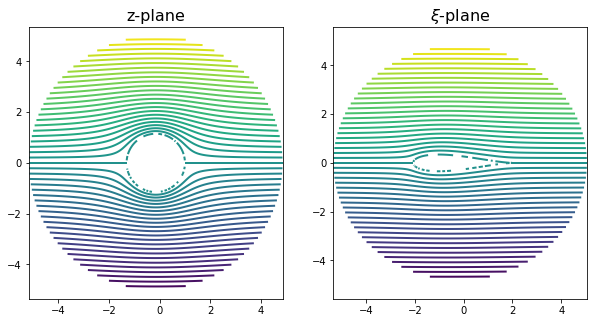

In [12]:
size = 5
plt.figure(figsize=(size*2, size))
plt.subplot(121)
plt.title('z-plane', fontsize=16)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.contour(X, Y, psi,51, linewidths=2)
plt.axis('equal')

Z = X + Y*1j
Z = zhuk(Z, c)

plt.subplot(122)
plt.title(r'$\xi$-plane', fontsize=16)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.contour(Z.real, Z.imag, psi, 51, linewidths=2)
plt.axis('equal')

(-5.344174757281554, 5.056185567010309, -4.800179838145669, 4.800179838145669)

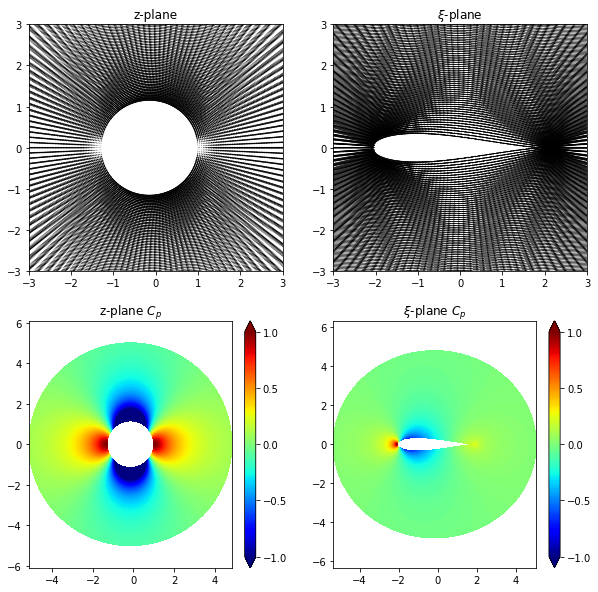

In [13]:
size = 10
fig1 = plt.figure(figsize=(size, size))
plt.subplot(221)
plt.title('z-plane', fontsize=12)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.quiver(X, Y, u, v, scale=40)

Z = X + Y*1j

U = ((u-v*1j)/(1-(c/Z)**2)).real
V = -((u-v*1j)/(1-(c/Z)**2)).imag

Z = zhuk(Z, c)

plt.subplot(222)
plt.title(r'$\xi$-plane', fontsize=12)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.quiver(Z.real, Z.imag, U, V, scale=20)

Cp = 1.0 - (u**2+v**2)/u_inf**2
Cp_xi = 1.0 - (U**2+V**2)/u_inf**2

plt.subplot(223)
plt.title('z-plane $C_p$', fontsize=12)
plt.contourf(X, Y, Cp, levels=np.linspace(-1., 1., 200), extend='both', cmap='jet')
plt.colorbar(ticks=[-1., -0.5, 0., 0.5, 1.])
plt.axis('equal')

plt.subplot(224)
plt.title(r'$\xi$-plane $C_p$', fontsize=12)
plt.contourf(Z.real, Z.imag, Cp_xi, levels=np.linspace(-1., 1., 200), extend='both', cmap='jet')
plt.colorbar(ticks=[-1., -0.5, 0., 0.5, 1.])
plt.axis('equal')

## Контрольные вопросы

In [14]:
print("Интенсивность диполя: %.2f" % kappa)
print("Скорость в 62й точке на поверхности профиля:")
print("Минимальный коэффициент давления: %.2f" % np.amin(Cp), "а для кси: %.2f" % np.amin(Cp_xi))

Интенсивность диполя: 8.31
Скорость в 62й точке на поверхности профиля:
Минимальный коэффициент давления: -3.00 а для кси: -0.69


## 5. Обтекание симметричного профиля Жуковского под ненулевым углом атаки, без циркуляции

(-5.344174757281554, 5.056185567010309, -4.800179838145669, 4.800179838145669)

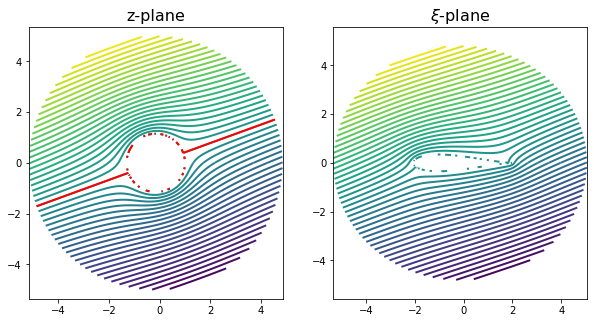

In [15]:
AoA = 20*np.pi/180

X_ = (X - x_c)*np.cos(AoA) + (Y - y_c)*np.sin(AoA)
Y_ = -(X - x_c)*np.sin(AoA) + (Y - y_c)*np.cos(AoA)

u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet-x_c, y_doublet-y_c, X_, Y_)
psi_doublet = get_stream_function_doublet(kappa, x_doublet-x_c, y_doublet-y_c, X_, Y_)

u_freestream = u_inf*np.ones_like(X_)
v_freestream = np.zeros_like(Y_)

psi_freestream = u_inf*Y_

u_ = u_freestream + u_doublet
v_ = v_freestream + v_doublet
psi_ = psi_freestream + psi_doublet

size = 5
plt.figure(figsize=(size*2, size))
plt.subplot(121)
plt.title('z-plane', fontsize=16)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.contour(X, Y, psi_,51 , linewidths=2)
plt.contour(X, Y, psi_, levels=[0.], colors='r', linewidths=2)
plt.axis('equal')

Z = X + Y*1j
Z = zhuk(Z, c)

plt.subplot(122)
plt.title(r'$\xi$-plane', fontsize=16)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.contour(Z.real, Z.imag, psi_, 51, linewidths=2)
plt.axis('equal')

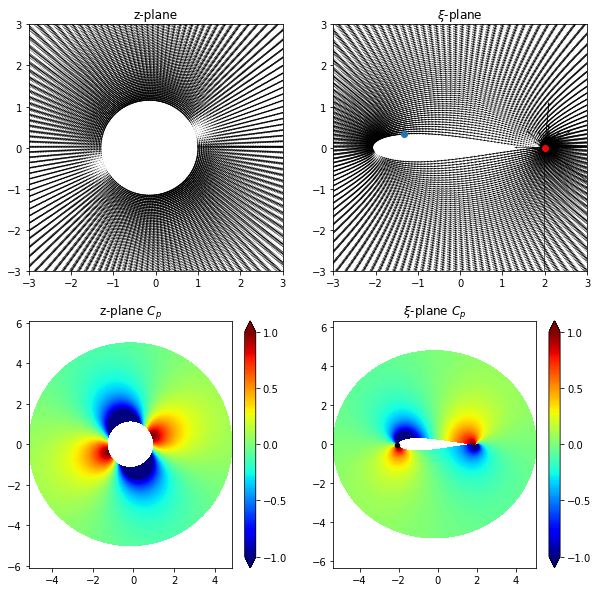

In [16]:
u = ((u_ - v_*1j)*(np.cos(AoA) - 1j*np.sin(AoA))).real
v = -((u_ - v_*1j)*(np.cos(AoA) - 1j*np.sin(AoA))).imag

Z = X + Y*1j

size = 10
fig1 = plt.figure(figsize=(size, size))
plt.subplot(221)
plt.title('z-plane', fontsize=12)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.quiver(X, Y, u, v, scale=50)

U = ((u-v*1j)/(1-(c/Z)**2)).real
V = -((u-v*1j)/(1-(c/Z)**2)).imag
Z = zhuk(Z, c)

plt.subplot(222)
plt.title(r'$\xi$-plane', fontsize=12)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.quiver(Z.real, Z.imag, U, V, scale=50)
plt.scatter(Z.real[0, 0], Z.imag[0, 0], color='r')
plt.scatter(Z.real[50, 0], Z.imag[50, 0])

Cp = 1.0 - (u**2+v**2)/u_inf**2
Cp_xi = 1.0 - (U**2+V**2)/u_inf**2

plt.subplot(223)
plt.title('z-plane $C_p$', fontsize=12)
plt.xlim(-5.5, 5.5)
plt.ylim(-5.5, 5.5)
plt.contourf(X, Y, Cp,levels=np.linspace(-1., 1., 200), extend='both', cmap='jet')
plt.colorbar(ticks=[-1., -0.5, 0., 0.5, 1.])
plt.axis('equal')

plt.subplot(224)
plt.title(r'$\xi$-plane $C_p$', fontsize=12)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.contourf(Z.real, Z.imag, Cp_xi, levels=np.linspace(-1., 1., 200), extend='both', cmap='jet')
plt.colorbar(ticks=[-1., -0.5, 0., 0.5, 1.])
plt.axis('equal')
plt.scatter(Z.real[75, 0], Z.imag[75, 0], color='k', s=20)

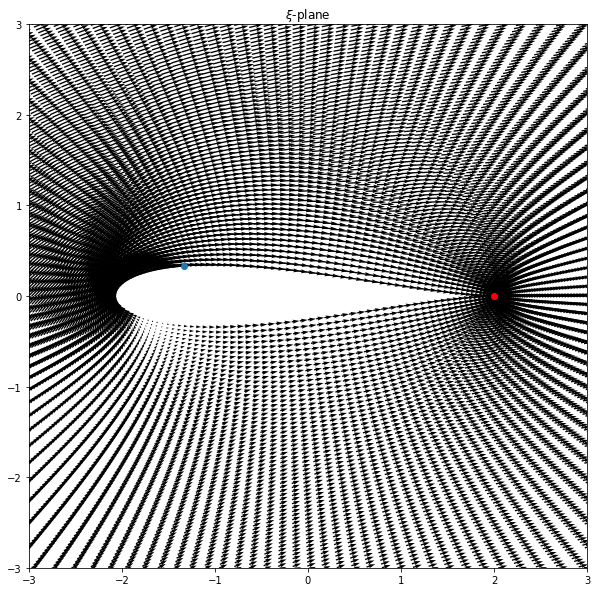

In [25]:
size = 10
fig1 = plt.figure(figsize=(size, size))

plt.title(r'$\xi$-plane', fontsize=12)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.quiver(Z.real, Z.imag, U, V, scale=50)
plt.scatter(Z.real[0, 0], Z.imag[0, 0], color='r')
plt.scatter(Z.real[50, 0], Z.imag[50, 0])

## Контрольные вопросы

In [17]:
print("Решение не физично в силу невыполнения условия Кутты-Жуковского")
print("Точки торможения имеют индексы", np.where(np.abs(U**2+V**2)==np.amin(np.abs(U**2+V**2))))
print("Скорость в 50й точке: %.2f" %  (U[50, 0]**2+V[50, 0]**2))
print("Коэффициент давления в 75й точке: %.2f" % Cp_xi[75, 0])
print("X = 0, Y = 0 в силу стационарности обтекания")

Решение не физично в силу невыполнения условия Кутты-Жуковского
Точки торможения имеют индексы (array([80]), array([0]))
Скорость в 50й точке: 2.31
Коэффициент давления в 75й точке: 0.05
X = 0, Y = 0 в силу стационарности обтекания


## 6. Обтекание симметричного профиля Жуковского под ненулевым углом атаки при наличии циркуляции

In [18]:
gamma = np.sin(AoA)*4*np.pi*Rad #из Ляпунова
x_vortex, y_vortex = x_c, y_c

In [19]:
def get_velocity_vortex(strength, xv, yv, X, Y):
   
    u = + strength/(2*np.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*np.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    
    psi = strength/(4*np.pi)*np.log((X-xv)**2+(Y-yv)**2)
    return psi

In [20]:
# рассчитываем поле скоростей в узлах расчетной сетки
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex-x_c, y_vortex-y_c, X_, Y_)

# рассчитываем функцию тока в узлах расчетной сетки
psi_vortex = get_stream_function_vortex(gamma, x_vortex-x_c, y_vortex-y_c, X_, Y_)

In [21]:
# суперпозиция диполя, вихря и набегающего потока
u_ = u_freestream + u_doublet + u_vortex
v_ = v_freestream + v_doublet + v_vortex
psi_ = psi_freestream + psi_doublet + psi_vortex

(-5.344174757281554, 5.056185567010309, -4.800179838145669, 4.800179838145669)

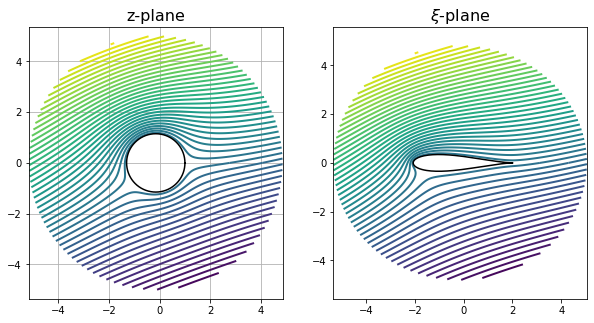

In [22]:
size = 5
plt.figure(figsize=(size*2, size))
plt.subplot(121)
plt.title('z-plane', fontsize=16)

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.contour(X, Y, psi_, 51, linewidths=2)
plt.plot(X[..., 0], Y[..., 0], color='k')
plt.axis('equal')
plt.grid()

Z = X + Y*1j
Z = zhuk(Z, c)

plt.subplot(122)
plt.title(r'$\xi$-plane', fontsize=16)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.contour(Z.real, Z.imag, psi_, 51, linewidths=2)
plt.plot(Z.real[..., 0], Z.imag[..., 0], color='k')
plt.axis('equal')

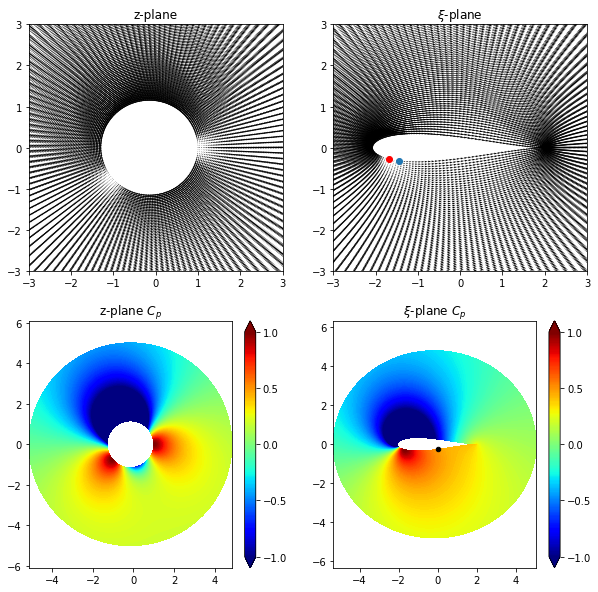

In [23]:
u = ((u_ - v_*1j)*(np.cos(AoA) - 1j*np.sin(AoA))).real
v = -((u_ - v_*1j)*(np.cos(AoA) - 1j*np.sin(AoA))).imag

Z = X + Y*1j

size = 10
fig1 = plt.figure(figsize=(size, size))
plt.subplot(221)
plt.title('z-plane', fontsize=12)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.quiver(X, Y, u, v, scale=50)

U = ((u-v*1j)/(1-(c/Z)**2)).real
V = -((u-v*1j)/(1-(c/Z)**2)).imag
Z = zhuk(Z, c)

plt.subplot(222)
plt.title(r'$\xi$-plane', fontsize=12)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.quiver(Z.real, Z.imag, U, V, scale=50)
plt.scatter(Z.real[92, 0], Z.imag[92, 0])
plt.scatter(Z.real[88, 0], Z.imag[88, 0], color='r')


Cp = 1.0 - (u**2+v**2)/u_inf**2
Cp_xi = 1.0 - (U**2+V**2)/u_inf**2

plt.subplot(223)
plt.title('z-plane $C_p$', fontsize=12)
plt.xlim(-5.5, 5.5)
plt.ylim(-5.5, 5.5)
plt.contourf(X, Y, Cp,levels=np.linspace(-1., 1., 200), extend='both', cmap='jet')
plt.colorbar(ticks=[-1., -0.5, 0., 0.5, 1.])
plt.axis('equal')

plt.subplot(224)
plt.title(r'$\xi$-plane $C_p$', fontsize=12)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.contourf(Z.real, Z.imag, Cp_xi, levels=np.linspace(-1., 1., 200), extend='both', cmap='jet')
plt.colorbar(ticks=[-1., -0.5, 0., 0.5, 1.])
plt.axis('equal')
plt.scatter(Z.real[111, 0], Z.imag[111, 0], color='k', s=20)

## Контрольные вопросы

In [24]:
print("Точки торможения имеют индексы", np.where(np.abs(U**2+V**2)==np.amin(np.abs(U**2+V**2))))
print("Скорость в 92й точке: %.2f" %  (U[92, 0]**2+V[92, 0]**2))
print("Коэффициент давления в 111й точке: %.2f" % Cp_xi[111, 0])
print("Коэффициент давления на задней кромке профиля: %.2f" % Cp_xi[0, 0], "(конечен)")
p = 1*u_inf*gamma
print("L = ro*u_inf*gamma = %.2f" % p)
print("D = 0 так как при возвращении в исх. координаты возникает симметрия задачи")

Точки торможения имеют индексы (array([88]), array([0]))
Скорость в 92й точке: 0.07
Коэффициент давления в 111й точке: 0.49
Коэффициент давления на задней кромке профиля: 0.75 (конечен)
L = ro*u_inf*gamma = 4.94
D = 0 так как при возвращении в исх. координаты возникает симметрия задачи
